In [4]:
# Copy TDPF for mobility matrix from calibration script

from covid19model.data import mobility
from covid19model.models.time_dependant_parameter_fncs import make_mobility_update_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
agg='prov'

proximus_mobility_data = mobility.get_proximus_mobility_data(agg)

In [2]:
mobility_function = make_mobility_update_function(proximus_mobility_data).mobility_wrapper_func

In [5]:
param=0
states=0
t0=pd.Timestamp(2020, 1, 1)

P_gh = []
dates = []
for i in range(365*2+1):
    t = t0 + pd.Timedelta(days=i)
    P_gh_value = mobility_function(t, states, param)[0, 0] # mobilty from 10000 to 10000
    dates.append(t)
    P_gh.append(P_gh_value)

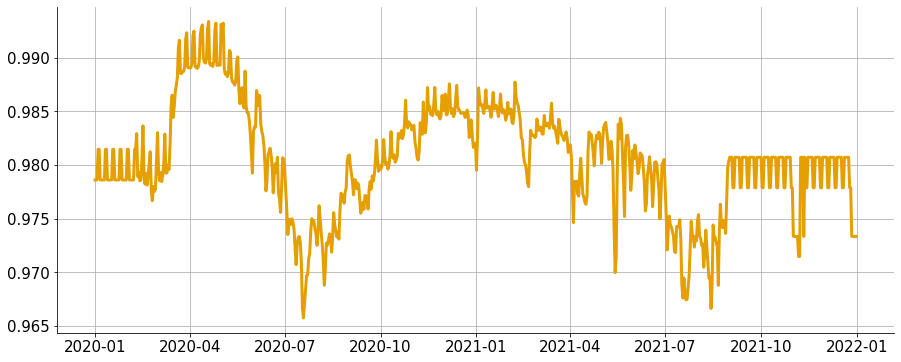

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(dates, P_gh)

In [18]:
mobility_function(pd.Timestamp(2021, 11, 2), states, param).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])